In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from matplotlib import pyplot as plt
import re,string
from datetime import datetime as dt
import seaborn as sns
import numpy as np 
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import random
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout
from sklearn.preprocessing import StandardScaler

In [3]:
final_rest_df= pd.read_csv('/content/drive/MyDrive/datasets/Dataset_latest.csv')

In [5]:
final_rest_df.head(5)

,stars,American,Mexican,Italian,Japanese,Chinese,Thai,Mediterranean,French,Vietnamese,Greek,Indian,Korean,Hawaiian,African,Spanish,Middle Eastern,Other,age,review_count_16_19,review_normalized,pos,neg,neutral,pos_norm,neg_norm,neutral_norm,bi_goodfood_text,bi_goodloc_text,bi_bad_text,Delivery,RestaurantsPriceRange2,OutdoorSeating,HasTV,Touristy,Hipster,Romantic,Divey,Intimate,Trendy,Upscale,Classy,Casual,Alc_None_served,Alc_beer_and_wine,Alc_full_bar,open_breakfast,open_lunch,open_dinner,open_hours_meals,displayed_open_hours,is_crowded,is_chain,is_open,operation_years
0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,3,34,11.33,23,5,6,7.67,1.67,2.00,0,4,1,1,2,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,2,1,1,0,1,1
1,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10,5,0.50,4,1,0,0.40,0.10,0.00,2,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,3
2,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,74,14.80,53,14,7,10.60,2.80,1.40,6,3,2,1,2,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,3,1,1,0,0,0
3,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,216,14.40,163,33,20,10.87,2.20,1.33,30,34,12,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,2,1,1,0,0,0
4,4.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,14,3.50,13,1,0,3.25,0.25,0.00,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,3


Dropped age and operation years column as there was data leakage to target variable. And the normalized variables were dropped as the inuition for creating this variable considering the age parameter was not entirely justified. 

In [6]:
drop_cols= ['age', 'review_normalized', 'pos_norm', 'neg_norm', 'neutral_norm', 'operation_years']

In [7]:
dict_val= {1:0, 0:1}
final_rest_df['is_open']= final_rest_df['is_open'].map(dict_val)
df= final_rest_df.drop(drop_cols, axis=1)

In [ ]:
df.head(3)

,stars,American,Mexican,Italian,Japanese,Chinese,Thai,Mediterranean,French,Vietnamese,Greek,Indian,Korean,Hawaiian,African,Spanish,Middle Eastern,Other,review_count_16_19,pos,neg,neutral,bi_goodfood_text,bi_goodloc_text,bi_bad_text,Delivery,RestaurantsPriceRange2,OutdoorSeating,HasTV,Touristy,Hipster,Romantic,Divey,Intimate,Trendy,Upscale,Classy,Casual,Alc_None_served,Alc_beer_and_wine,Alc_full_bar,open_breakfast,open_lunch,open_dinner,open_hours_meals,displayed_open_hours,is_crowded,is_chain,is_open
0,4.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,34,23,5,6,0,4,1,1,2,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,2,1,1,0,0
1,3.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,4,1,0,2,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,74,53,14,7,6,3,2,1,2,1,1,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,3,1,1,0,1


### Correlation

In [ ]:
# https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

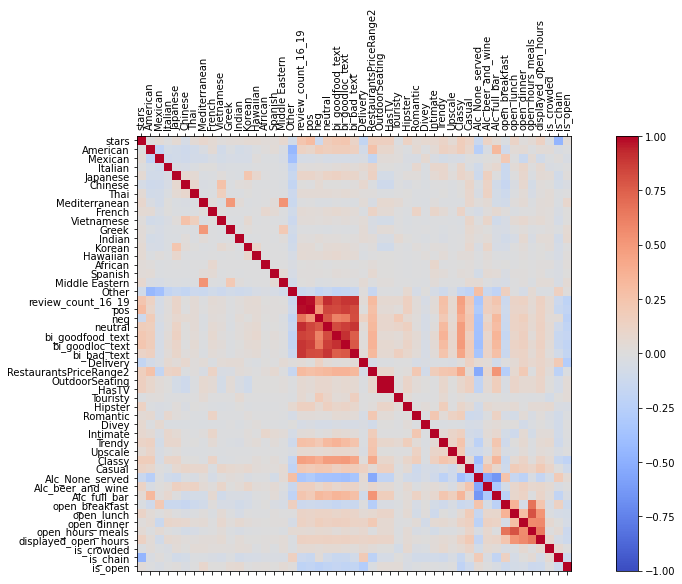

In [ ]:
corr = df.corr()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [8]:
cols_drop= ['pos', 'neg', 'neutral', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours'] #review_count_16_19 # 
df_new = df.drop(cols_drop, axis=1)

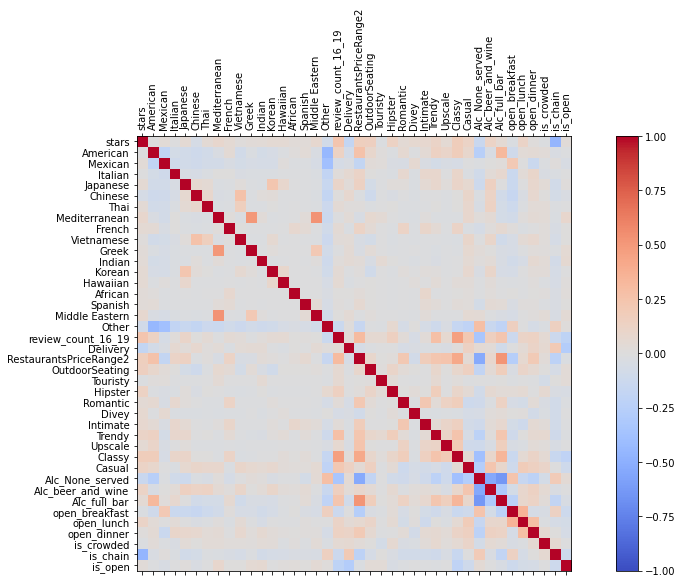

In [ ]:
corr = df_new.corr()
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_new.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_new.columns)
ax.set_yticklabels(df_new.columns)
plt.show()

#### Scaling

In [9]:
def scaling_func(x_train, x_test, category_cols):
    x_train_scale= x_train[num_feature]
    x_test_scale= x_test[num_feature]

    #filter categorical columns
    cat_train= x_train[category_cols]
    cat_test= x_test[category_cols]

    scaler = StandardScaler()
    train_trans= scaler.fit_transform(x_train_scale.values)
    test_trans= scaler.transform(x_test_scale)
    x_train_scale.iloc[:][:]= train_trans
    x_test_scale.iloc[:][:]= test_trans

    #Concat numerical scaled cols to category columns
    scale_train= pd.concat([x_train_scale, cat_train], axis=1, ignore_index=True)
    scale_test= pd.concat([x_test_scale, cat_test], axis=1, ignore_index=True)

    return scale_train.values, scale_test.values

#### ANN

In [10]:
def model_train(X_train, Y_train, X_val, Y_val, epochs, neurons, batch, act_func, lrate=None):
    # define model
    initializer = tf.keras.initializers.GlorotNormal() #seed=42)
    opt= tf.keras.optimizers.Adam(learning_rate=0.00001)
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=act_func, kernel_initializer=initializer))
    #model.add(Dropout(0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    
    history= model.fit(X_train, Y_train, epochs=epochs, batch_size= batch, validation_data=(X_val, Y_val), shuffle= True, verbose=0) #, callbacks=callbacks)
    return model, history

#### With dropped co-related features:

In [11]:
from sklearn.model_selection import StratifiedKFold

In [12]:
#scale only numerical columns:

num_feature= ['stars', 'review_count_16_19', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)

['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']


In [13]:
features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

In [113]:
def run_cross_validation(X, Y, acc_list, plots_enabled=False, return_model=False, predict_test=False, x_test=None, y_test=None, test_acc=None, roc=False):
    skf = StratifiedKFold(n_splits = 5, random_state = 7, shuffle = True) 
    ctr=1
    yhat_prob_list= []
    for train_index, val_index in skf.split(X, Y):

        print('Running for K= ', ctr)
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]
        model, history= model_train(X_train, Y_train, X_val, Y_val, 300, 200, 64, 'tanh')
    
        ######plots
        if plots_enabled:
            fig, axs= plt.subplots(1,2)
            fig.suptitle(f"For K= {ctr}")
            axs[0].plot(history.history['loss'], label='train')
            axs[0].plot(history.history['val_loss'], label='validation')
            axs[0].title.set_text('Loss Plot')
            axs[0].legend()
            axs[1].plot(history.history['accuracy'], label='train')
            axs[1].plot(history.history['val_accuracy'], label='validation')
            axs[1].title.set_text('accuracy Plot')
            axs[1].legend()
            plt.show()

        acc_list.append(history.history['val_accuracy'][-1]) 

        if predict_test:
            yhat_probs = model.predict(x_test, verbose=0)
            yhat_probs = yhat_probs[:, 0]
            yhat_classes = 1*(yhat_probs > 0.5)
            accuracy = accuracy_score(y_test, yhat_classes) 
            #print('accuracy: ', accuracy)
            test_acc.append(accuracy)
            #matrix = confusion_matrix(y_test, yhat_classes)
            #print('Confusion matrix: ')
            #print(matrix)
            #print()
        
            if roc:
                yhat_prob_list.append(yhat_probs)

        ctr+=1
    
    if (return_model and predict_test):
        yhat_probs = model.predict(x_test, verbose=0)
        yhat_probs = yhat_probs[:, 0]
        yhat_classes = 1*(yhat_probs > 0.5)
        accuracy = accuracy_score(y_test, yhat_classes) 
        print('accuracy: ', accuracy)
        return model, history, acc_list, test_acc, yhat_prob_list
    if return_model:
        return model, history, acc_list

    return acc_list

#### Undersample majority class (Accuracy):

In [ ]:
from imblearn.under_sampling import NearMiss 
from collections import Counter
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import NeighbourhoodCleaningRule
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

NearMiss:

In [27]:
c=Counter(y_train)
print(c)
nr = NearMiss(version=3, n_neighbors_ver3=3)
X_near, Y_near= nr.fit_sample(scale_train, y_train) 
c=Counter(Y_near)
print(c)

near_accuracy=[]
plots_enabled= False

mod, hist, near_accuracy= run_cross_validation(X_near, Y_near, near_accuracy, plots_enabled, True)

Counter({0: 1839, 1: 467})
Counter({0: 467, 1: 467})
Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


Condensed Nearest Neighbour:

In [19]:
# define the undersampling method
c=Counter(y_train)
undersample = CondensedNearestNeighbour(n_neighbors=2)
# transform the dataset
X_cnn, Y_cnn= undersample.fit_resample(scale_train, y_train)

# summarize the new class distribution
counter = Counter(Y_cnn)
print(counter)

Counter({1: 467, 0: 368})


In [21]:
cnn_accuracy=[]
plots_enabled= False

mod, hist, cnn_accuracy= run_cross_validation(X_cnn, Y_cnn, cnn_accuracy, plots_enabled, True)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


In [23]:
def run_cross_validation_f1_score(X, Y, acc_list, plots_enabled=False, return_model= False):
    skf = StratifiedKFold(n_splits = 5, shuffle = True) 
    ctr=1
    for train_index, val_index in skf.split(X, Y):

        print('Running for K= ', ctr)
        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        #print(X_train.shape, X_val.shape, Y_train.shape, Y_val.shape)
        model, history= model_train(X_train, Y_train, X_val, Y_val, 300, 200, 16, 'tanh')
    
        ######plots
        if plots_enabled:
            fig, axs= plt.subplots(1,1)
            fig.suptitle(f"For K= {ctr}")
            axs.plot(history.history['loss'], label='train')
            axs.plot(history.history['val_loss'], label='validation')
            axs.title.set_text('Loss Plot')
            axs.legend()
            plt.show()
        
        ## predict probabilities for test set
        yhat_probs = model.predict(X_val, verbose=0)
        yhat_probs = yhat_probs[:, 0]
        # predict crisp classes for test set
        yhat_classes = 1*(yhat_probs > 0.5)       
        # f1: 2 tp / (2 tp + fp + fn)
        f1 = f1_score(Y_val, yhat_classes)

        acc_list.append(f1) 
        ctr+=1

        #if return_model:
        #    print('ff')
        #    matrix = confusion_matrix(Y_val, yhat_classes)
        #    sns.heatmap(matrix, annot=True)
        #    plt.show()
    if return_model:
        return model,history, acc_list
    return acc_list

Tomek Links

In [24]:
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X_toml, Y_toml= undersample.fit_resample(scale_train, y_train)
counter = Counter(Y_toml)
print(counter)

Counter({0: 1719, 1: 467})


In [25]:
toml_f1=[]
plots_enabled= False

mod, hist,toml_f1= run_cross_validation_f1_score(X_toml, Y_toml, toml_f1, plots_enabled, True)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


Neighbourhood cleaning Rule:

In [28]:
# define the undersampling method
c=Counter(y_train)
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
print('Before: ',c)
X_ncr, Y_ncr= undersample.fit_resample(scale_train, y_train)
counter = Counter(Y_ncr)
print('After: ',counter)

Before:  Counter({0: 1839, 1: 467})
After:  Counter({0: 1208, 1: 467})


In [30]:
ncr_f1=[]
plots_enabled= False

mod, hist,ncr_f1= run_cross_validation_f1_score(X_ncr, Y_ncr, ncr_f1, plots_enabled, True)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


In [93]:
near_arr= np.array(near_accuracy)
cnn_arr= np.array(cnn_accuracy)
toml_arr= np.array(toml_f1)
ncr_arr= np.array(ncr_f1)

CTEs = [near_arr.mean(), cnn_arr.mean()]
error = [near_arr.std(), cnn_arr.std()]

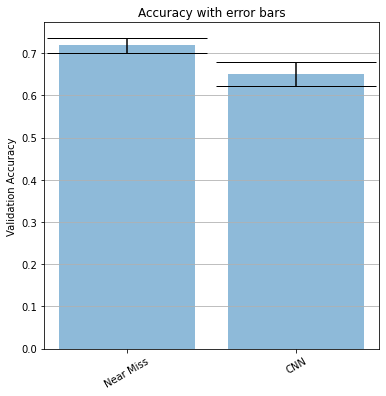

In [94]:
labels= ['Near Miss', "CNN"]
x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=80)
ax.set_ylabel('Validation Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(ax.get_xticks(), rotation = 30)
ax.set_xticklabels(labels)
ax.set_title('Accuracy with error bars')
ax.yaxis.grid(True)
plt.show()

In [39]:
yhat_probs = mod.predict(scale_test, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = 1*(yhat_probs > 0.5)
accuracy = accuracy_score(y_test, yhat_classes) 
print('accuracy: ', accuracy)

accuracy:  0.7816291161178509


In [40]:
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes)
print('F1 score: %f' % f1)
# confusion matrix
matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix: ')
print(matrix)

Precision: 0.463576
Recall: 0.608696
F1 score: 0.526316
Confusion matrix: 
[[381  81]
 [ 45  70]]


In [95]:
CTEs = [toml_arr.mean(), ncr_arr.mean()]
error = [toml_arr.std(), ncr_arr.std()]

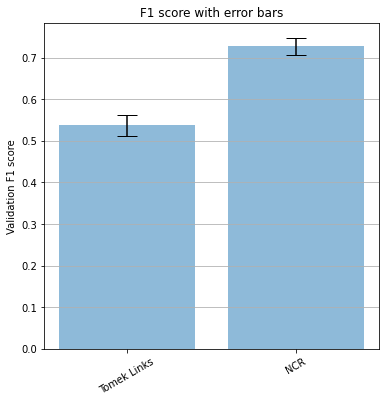

In [96]:
labels= ['Tomek Links', "NCR"]
x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Validation F1 score')
ax.set_xticks(x_pos)
ax.set_xticklabels(ax.get_xticks(), rotation = 30)
ax.set_xticklabels(labels)
ax.set_title('F1 score with error bars')
ax.yaxis.grid(True)
plt.show()

#### Considering 'total count' and dropping 'pos' 'neg' 'neutral':

In [41]:
cols_drop= ['pos', 'neg', 'neutral', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

In [42]:
#scale only numerical columns:
num_feature= ['stars', 'review_count_16_19', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)


features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

c=Counter(y_train)
print(c)
nr = NearMiss(version=3)
X_near, Y_near= nr.fit_sample(scale_train, y_train) 
c=Counter(Y_near)
print(c)


['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']
Counter({0: 1839, 1: 467})
Counter({0: 467, 1: 467})


In [47]:
acc_case1=[]
plots_enabled= False

mod, hist, acc_case1= run_cross_validation(X_near, Y_near, acc_case1, plots_enabled, True)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


#### Considering 'pos' 'neg' 'neutral' and dropping 'total count':

In [48]:
cols_drop= ['review_count_16_19', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

In [49]:
#scale only numerical columns:
num_feature= ['stars', 'pos', 'neg','neutral', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)

features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

c=Counter(y_train)
print(c)
nr = NearMiss(version=3)
X_near, Y_near= nr.fit_sample(scale_train, y_train) 
c=Counter(Y_near)
print(c)

['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']
Counter({0: 1839, 1: 467})
Counter({0: 467, 1: 467})


In [ ]:
acc_case2=[]
plots_enabled= False
mod, hist, acc_case2= run_cross_validation(X_near, Y_near, acc_case2, plots_enabled, True)

##### All categorical

In [54]:
cols_drop= ['stars', 'pos', 'neg','neutral', 'RestaurantsPriceRange2', 'review_count_16_19', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

In [55]:
num_feature= []

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
print(category_cols)

['American', 'Mexican', 'Italian', 'Japanese', 'Chinese', 'Thai', 'Mediterranean', 'French', 'Vietnamese', 'Greek', 'Indian', 'Korean', 'Hawaiian', 'African', 'Spanish', 'Middle Eastern', 'Other', 'Delivery', 'OutdoorSeating', 'Touristy', 'Hipster', 'Romantic', 'Divey', 'Intimate', 'Trendy', 'Upscale', 'Classy', 'Casual', 'Alc_None_served', 'Alc_beer_and_wine', 'Alc_full_bar', 'open_breakfast', 'open_lunch', 'open_dinner', 'is_crowded', 'is_chain']


In [62]:
features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

x_train= x_train.values
x_test= x_test.values

c=Counter(y_train)
print(c)
nr = NearMiss(version=3)
X_near, Y_near= nr.fit_sample(x_train, y_train) 
c=Counter(Y_near)
print(c)

Counter({0: 1839, 1: 467})
Counter({0: 467, 1: 467})


In [63]:
acc_case3=[]
plots_enabled= False
acc_case3= run_cross_validation(X_near, Y_near, acc_case3, plots_enabled)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5


Error plots:

In [98]:
acc1_arr= np.array(acc_case1)
acc2_arr= np.array(acc_case2)
acc3_arr= np.array(acc_case3)

CTEs = [acc1_arr.mean(), acc2_arr.mean(), acc3_arr.mean()]
error = [acc1_arr.std(), acc2_arr.std(), acc3_arr.std()]

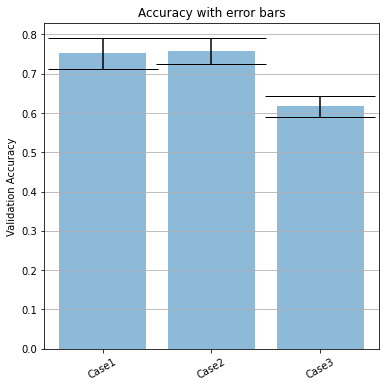

In [99]:
labels= ['Case1', "Case2", 'Case3']
x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=55)
ax.set_ylabel('Validation Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(ax.get_xticks(), rotation = 30)
ax.set_xticklabels(labels)
ax.set_title('Accuracy with error bars')
ax.yaxis.grid(True)
plt.show()

#### Final model:

In [126]:
cols_drop= ['pos', 'neg', 'neutral', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

#scale only numerical columns:
num_feature= ['stars', 'review_count_16_19', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
#print(category_cols)


features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20) #, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

c=Counter(y_train)
print(c)
nr = NearMiss(version=3)
X_near, Y_near= nr.fit_sample(scale_train, y_train) 
c=Counter(Y_near)
print(c)

Counter({0: 1844, 1: 462})
Counter({0: 462, 1: 462})


In [127]:
plots_enabled= False
return_model=True
predict_test= True
model, history, acc_list, test_acc, y_prob_list= run_cross_validation(X_near, Y_near, [], plots_enabled, True, predict_test, scale_test, y_test, [], True)

Running for K=  1
Running for K=  2
Running for K=  3
Running for K=  4
Running for K=  5
accuracy:  0.7175043327556326


In [140]:
yhat_probs = model.predict(scale_test, verbose=0)
yhat_probs = yhat_probs[:, 0]
yhat_classes = 1*(yhat_probs > 0.5)

matrix = confusion_matrix(y_test, yhat_classes)
print('Confusion matrix: ')
print(matrix)

Confusion matrix: 
[[343 114]
 [ 49  71]]


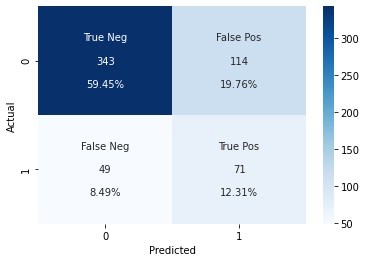

In [141]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in  zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

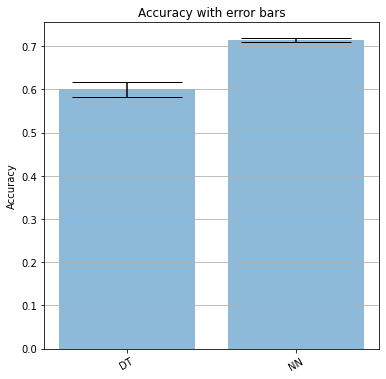

In [148]:
#Dt accuracy values:

dt_acc= np.array([0.5965665236051502, 0.6223175965665236, 0.592274678111588, 0.575107296137339, 0.6163793103448276])
test_acc= np.array(test_acc)

CTEs = [dt_acc.mean(), test_acc.mean()]
error = [dt_acc.std(), test_acc.std()]

labels= ['DT', "NN"]
x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6,6))
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=55)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(ax.get_xticks(), rotation = 30)
ax.set_xticklabels(labels)
ax.set_title('Accuracy with error bars')
ax.yaxis.grid(True)
plt.show()

In [130]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_test, yhat_probs)
auc = roc_auc_score(y_test, yhat_probs)
print('AUC: %.3f' % auc)

AUC: 0.739


In [136]:
#Decision Tree: 
fpr_dt= [0. ,0.07563025, 0.07563025, 0.08403361, 0.08403361, 0.08403361, 0.08403361, 0.14285714, 0.20168067, 0.2605042,  0.32773109, 0.47058824, 0.55462185, 0.68907563, 0.78151261, 0.78151261, 0.80672269, 0.80672269, 0.83193277, 1.]
tpr_dt= [0.,  0.20175439, 0.22807018, 0.23684211, 0.24561404, 0.28070175, 0.30701754, 0.35087719, 0.42982456, 0.49122807, 0.52631579, 0.68421053, 0.68421053, 0.76315789, 0.78070175, 0.78947368, 0.83333333, 0.84210526,  0.85087719, 1.]       

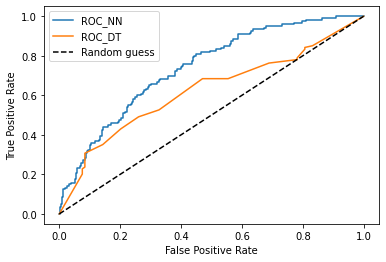

In [142]:
plt.plot(fpr, tpr, linestyle='-', label='ROC_NN')
plt.plot(fpr_dt, tpr_dt, linestyle='-', label='ROC_DT')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### Tuning NN:

In [9]:
# define model

def create_model(X_train, Y_train, X_val, Y_val, batch, epoch, neurons, init_param, optname, act_func, lrate, decay_lr= True):
    ################################################################# Reproducibility #########################################################
    tf.keras.backend.clear_session()
    np.random.seed(42)
    random.seed(12345)
    session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    tf.random.set_seed(1234)
    sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
    tf.compat.v1.keras.backend.set_session(sess)
    #############################################################################################################################################
    np.random.seed(0)
    #print(np.random.rand(4))
    if init_param== 'HE':
        initializer= tf.keras.initializers.HeNormal(seed=42)
    elif init_param=='GN':
        initializer = tf.keras.initializers.GlorotNormal(seed=42)
    elif init_param=='GU':
        initializer = tf.keras.initializers.GlorotUniform(seed=42)
    elif init_param== 'RU':
        initializer= tf.keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=42)

    if optname== 'ADAM':
        opt= tf.keras.optimizers.Adam(lrate)  
    elif optname== 'RMSProp':
        opt= tf.keras.optimizers.RMSprop(lrate, momentum=0.9)
    elif optname== 'SGD':
        opt= tf.keras.optimizers.SGD(lrate)

    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation=act_func, kernel_initializer=initializer))
    #model.add(Dense(50, input_dim=scale_x.shape[1], activation='tanh'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
    
    history= model.fit(X_train, Y_train, epochs=epoch, batch_size= batch, validation_data=(X_val, Y_val),shuffle= True, verbose=0) #, callbacks=callbacks)
    
    return model,history

In [8]:
epochs= [300]
neurons= [200, 300]
batches= [16, 32, 64]
act_funcs= ['relu', 'tanh']
init_param= ['HE', 'GN', 'GU', 'RU']
optnames= ['SGD', 'RMSProp', 'ADAM']

In [12]:
cols_drop= ['pos', 'neg', 'neutral', 'bi_goodfood_text', 'bi_goodloc_text', 'bi_bad_text', 'HasTV', 'open_hours_meals', 'displayed_open_hours']

df_new = df.drop(cols_drop, axis=1)

#scale only numerical columns:
num_feature= ['stars', 'review_count_16_19', 'RestaurantsPriceRange2']

x_train_cols= list(df_new.columns)
category_cols= []

for i in x_train_cols:
    if i not in num_feature:
        category_cols.append(i)

category_cols= category_cols[:-1]
#print(category_cols)


features= df_new.iloc[:,:-1]
labels= df_new.iloc[:,-1].values
x_train, x_test, y_train, y_test= train_test_split(features, labels, test_size=0.20, random_state=37)  

x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
scale_train, scale_test= scaling_func(x_train, x_test, category_cols)

# define the undersampling method
undersample = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
# transform the dataset
X_ncr, Y_ncr= undersample.fit_resample(x_train, y_train)
counter = Counter(Y_ncr)
print(counter)

Counter({0: 1202, 1: 467})


In [ ]:
mean_acc_Scores={}
for opt in optnames:
    for e in epochs:
        for n in neurons:
            for batch in batches:
                for act in act_funcs:
                    for param in init_param:
                        print('Running for OPT= {}, Epochs= {}, Neurons= {}, batch= {}, ACT_F={}, Param={}' .format(opt, e, n, batch, act, param)) 
                        str_name=str(opt)+'_'+str(e)+'_'+str(n)+'_'+str(batch)+'_'+str(act)
                        acc_scorelist= []
                        skf = StratifiedKFold(n_splits = 5, shuffle = True) 
                        for train_index, val_index in skf.split(X_ncr, Y_ncr):
                            X_train, X_val = X_ncr[train_index], X_ncr[val_index]
                            Y_train, Y_val = Y_ncr[train_index], Y_ncr[val_index]

                            model, history= create_model(X_train, Y_train, X_val, Y_val, batch, e, n, param, opt, act,  0.00001, False)
                            acc_scorelist.append(history.history['val_accuracy'][-1])

                        mean_acc_Scores[str_name]= np.round(np.mean(acc_scorelist), 3)     
                        #print('accuracy: ', np.round(np.mean(acc_scorelist), 3)) 

In [20]:
filenm= '/content/drive/MyDrive/datasets/acc_score.txt'
import json
with open(filenm, 'w') as convert_file:
     convert_file.write(json.dumps(mean_acc_Scores))